# Case Study: Unsupervised Machine Learning, Part 2—k-Means Clustering  

### Iris Dataset

## Self Check
**1. _(Fill-In)_** Each cluster of samples is grouped around a `________`—the cluster’s center point. 

**Answer:** centroid.

**2. _(True/False)_** The k-means clustering algorithm studies the dataset then automatically determines the appropriate number of clusters. 

**Answer:** False. The algorithm organizes samples into the number of clusters you specify in advance.

**We added `%matplotlib inline` to enable Matplotlib in this notebook.**

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
from sklearn.cluster import KMeans, DBSCAN, MeanShift, SpectralClustering, AgglomerativeClustering
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA


## 1 Loading the Iris Dataset

In [3]:
iris = load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Checking the Numbers of Samples, Features and Targets

In [5]:
iris.data.shape

(150, 4)

In [6]:
iris.target.shape

(150,)

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## 2 Exploring the Iris Dataset: Descriptive Statistics with Pandas

In [9]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [10]:
iris_df['species'] = [iris.target_names[i] for i in iris.target]

In [11]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
iris_df['species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

## 3 Visualizing the Dataset with a Seaborn `pairplot` 

In [14]:
sns.set(font_scale=1.1)

In [15]:
sns.set_style('whitegrid')

C:\Users\ihmgs\.conda\envs\Gus_ML_template\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


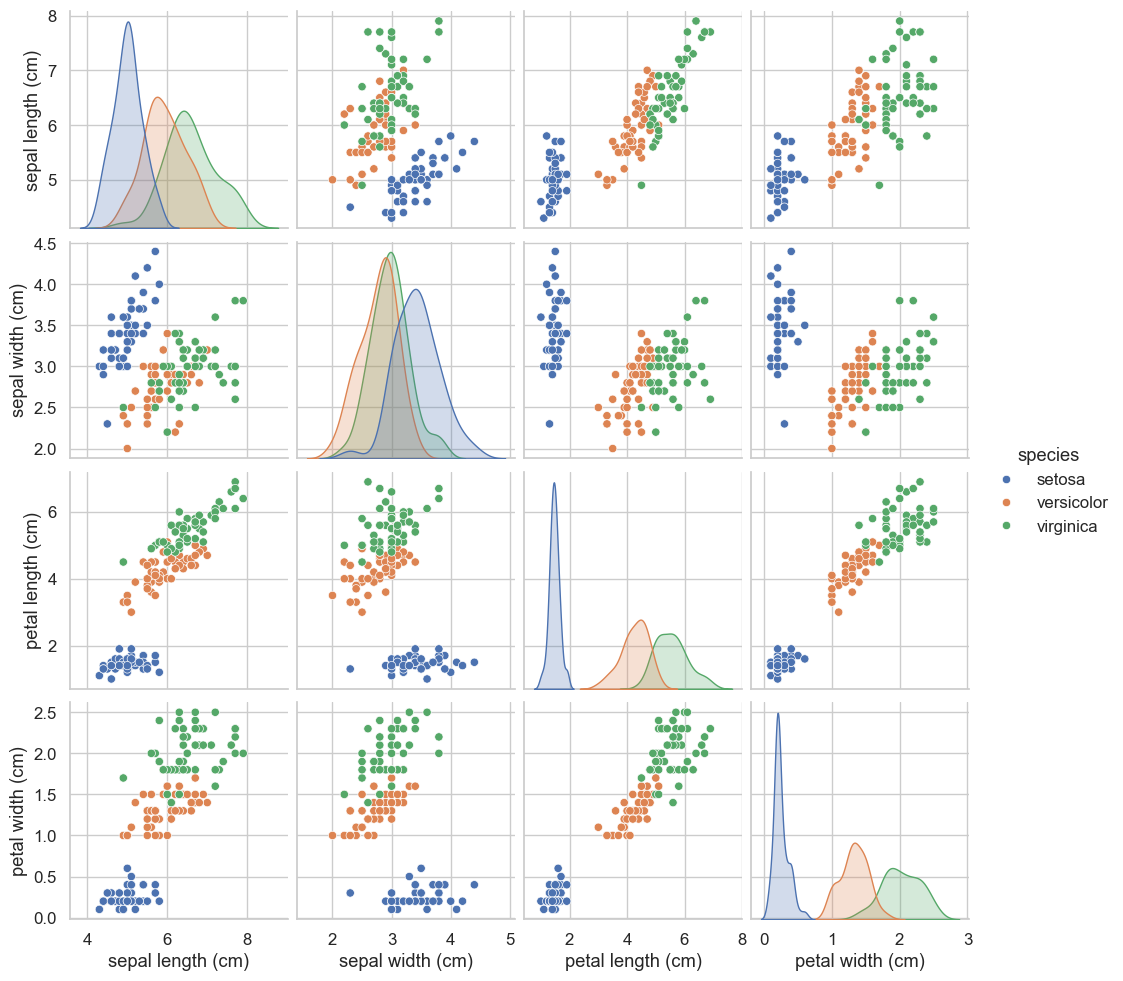

In [16]:
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4],
     hue='species')

### Displaying the pairplot in One Color

C:\Users\ihmgs\.conda\envs\Gus_ML_template\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


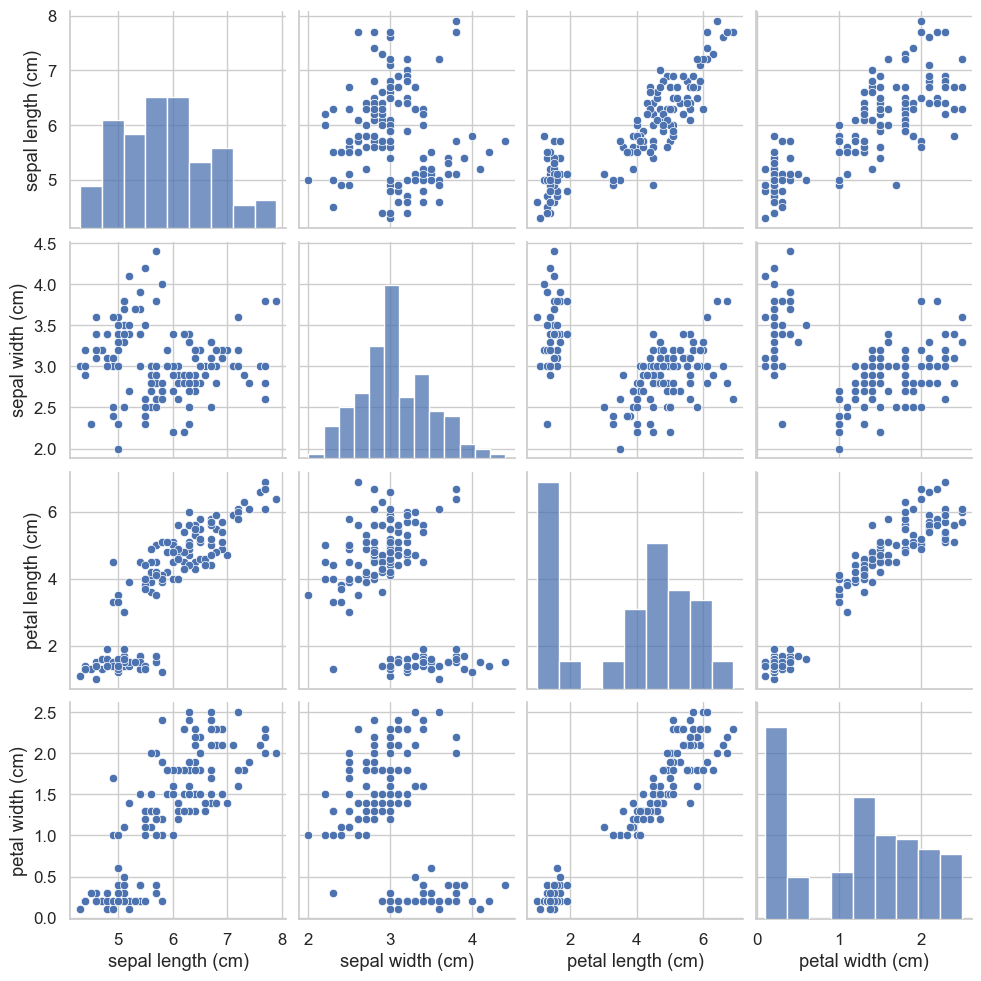

In [17]:
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4])

## 4 Self Check
**1. _(Fill-In)_** Seaborn’s `________` function creates a grid of scatter plots showing features against one another.

**Answer:** `pairplot`.

**2. _(True/False)_** A plot of a feature’s distribution shows the feature’s range of values (left-to-right) and the number of samples with those values (top-to-bottom). 

**Answer:** True.

## 5 Using a `KMeans` Estimator
### Creating the Estimator

In [18]:
kmeans = KMeans(n_clusters=3, random_state=11)

### Fitting the Model

In [19]:
kmeans.fit(iris.data)

C:\Users\ihmgs\.conda\envs\Gus_ML_template\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ihmgs\.conda\envs\Gus_ML_template\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=11)

### Comparing the Computer Cluster Labels to the Iris Dataset’s Target Values

In [20]:
print(kmeans.labels_[0:50])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [21]:
print(kmeans.labels_[50:100])

[0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [22]:
print(kmeans.labels_[100:150])

[2 0 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2
 2 0 2 2 2 0 2 2 2 0 2 2 0]


## 6 Self Check
**1. _(IPython Session)_** Try k-means clustering on the Iris dataset with two clusters, then display the first 50 and the last 100 elements of the estimator’s `labels_` array.

**Answer:** 

In [23]:
kmeans2 = KMeans(n_clusters=2, random_state=11)

In [24]:
kmeans2.fit(iris.data)

C:\Users\ihmgs\.conda\envs\Gus_ML_template\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ihmgs\.conda\envs\Gus_ML_template\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=11)

In [25]:
print(kmeans2.labels_[0:50])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [26]:
print(kmeans2.labels_[50:150])

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## 7 Dimensionality Reduction with Principal Component Analysis
### Creating the PCA Object

In [27]:
pca = PCA(n_components=2, random_state=11)

### Transforming the Iris Dataset’s Features into Two Dimensions

In [28]:
pca.fit(iris.data)

PCA(n_components=2, random_state=11)

In [29]:
iris_pca = pca.transform(iris.data)

In [30]:
iris_pca.shape

(150, 2)

### Visualizing the Reduced Data

In [31]:
iris_pca_df = pd.DataFrame(iris_pca, 
                            columns=['Component1', 'Component2'])

In [32]:
iris_pca_df['species'] = iris_df.species

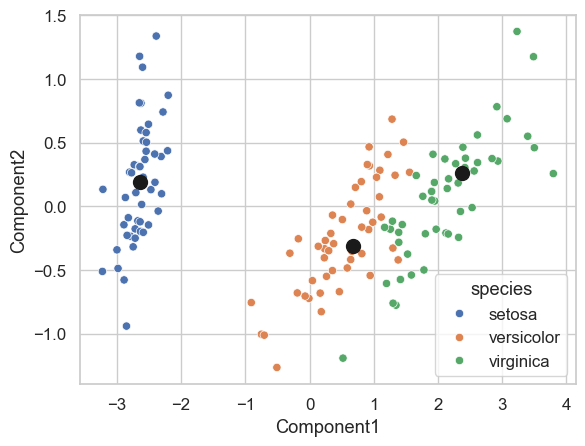

In [33]:
axes = sns.scatterplot(data=iris_pca_df, x='Component1', 
     y='Component2', hue='species', legend='brief') 

iris_centers = pca.transform(kmeans.cluster_centers_)

import matplotlib.pyplot as plt

dots = plt.scatter(iris_centers[:,0], iris_centers[:,1], 
                    s=100, c='k')

In [34]:
# This placeholder cell was added because we had to combine 
# the sections snippets 39-42 for the visualization to work in Jupyter
# and we wanted the subsequent snippet numbers to match the book

In [35]:
# placeholder cell 

In [36]:
# placeholder cell 

## 8 Self Check
**1. _(True/False)_** Each centroid in a `KMeans` object’s `cluster_centers_` array has the same number of features as the original dataset.

**Answer:** True.

**2. _(Discussion)_** What is the purpose of the following statement?
```python
iris_centers = pca.transform(kmeans.cluster_centers_)
```

**Answer:** This statement reduces the centroids to the number of dimensions specified when the pca object was created. In the Iris case study, we were able to plot the reduced centroids in two dimensions at the centers of their corresponding clusters.

## 9 Choosing the Best Clustering Estimator

In [37]:
estimators = {
    'KMeans': kmeans,
    'DBSCAN': DBSCAN(),
    'MeanShift': MeanShift(),
    'SpectralClustering': SpectralClustering(n_clusters=3),
    'AgglomerativeClustering': 
        AgglomerativeClustering(n_clusters=3)
}

In [38]:
for name, estimator in estimators.items():
     estimator.fit(iris.data)
     print(f'\n{name}:')
     for i in range(0, 101, 50):
         labels, counts = np.unique(
             estimator.labels_[i:i+50], return_counts=True)
         print(f'{i}-{i+50}:')
         for label, count in zip(labels, counts):
             print(f'   label={label}, count={count}')
             

C:\Users\ihmgs\.conda\envs\Gus_ML_template\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ihmgs\.conda\envs\Gus_ML_template\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



KMeans:
0-50:
   label=1, count=50
50-100:
   label=0, count=48
   label=2, count=2
100-150:
   label=0, count=14
   label=2, count=36

DBSCAN:
0-50:
   label=-1, count=1
   label=0, count=49
50-100:
   label=-1, count=6
   label=1, count=44
100-150:
   label=-1, count=10
   label=1, count=40

MeanShift:
0-50:
   label=1, count=50
50-100:
   label=0, count=49
   label=1, count=1
100-150:
   label=0, count=50

SpectralClustering:
0-50:
   label=0, count=50
50-100:
   label=1, count=50
100-150:
   label=1, count=15
   label=2, count=35

AgglomerativeClustering:
0-50:
   label=1, count=50
50-100:
   label=0, count=49
   label=2, count=1
100-150:
   label=0, count=15
   label=2, count=35


C:\Users\ihmgs\.conda\envs\Gus_ML_template\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
